In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

Загружаем датасет:

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Вернемся к нашему графику 'petal length  - petal width' из лабораторной 3.1.

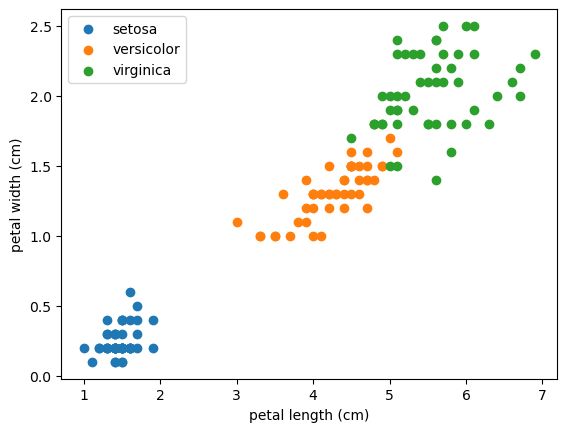

In [3]:
for i, name in enumerate(iris.target_names):
    first = df[df["target"] == i]["petal length (cm)"]
    second = df[df["target"] == i]["petal width (cm)"]
    plt.scatter(first, second, label=name)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()
plt.show()

Применяем логистическую регрессию для решения задачи многоклассовой классификации:

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=150)
clf.fit(df.drop(["target"], axis=1), df["target"])
y_pred = clf.predict(df.drop(["target"], axis=1))

Отображаем полученное решение на плоскости 'petal length  - petal width':

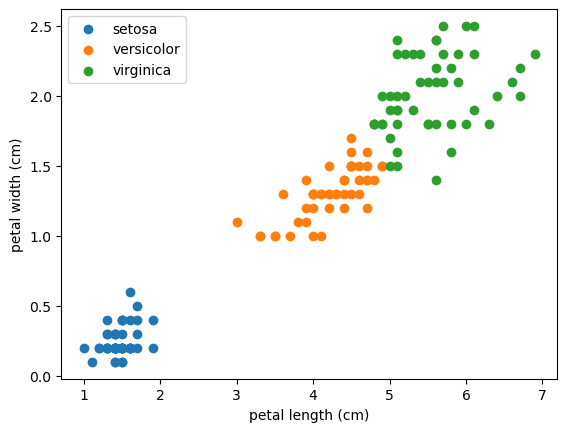

In [5]:
for i, name in enumerate(iris.target_names):
    first = df[y_pred == i]["petal length (cm)"]
    second = df[y_pred == i]["petal width (cm)"]
    plt.scatter(first, second, label=name)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()
plt.show()

Полученное решение почти совпадает с исходной выборкой, т.е. модель почти смогла под нее подстроиться. Различия есть только в небольшом количестве граничных точек между versicolor и virginica.